# Análisis exploratorio de datos

## Importación de librerías

In [120]:
!pip install folium

   ---------------------------------------- 0.0/108.9 kB ? eta -:--:--
   ---------------------------------------- 108.9/108.9 kB 6.2 MB/s eta 0:00:00


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import os
import plotly.express as pex
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import folium  
from   folium.plugins import HeatMap

## Preliminar

In [ ]:

path_file = r'C:\Users\danie\OneDrive\Documents\Bootcamp_Proyecto\stations.parquet' 
Sta = pd.read_parquet(path_file)
Sta
path_file = r'C:\Users\danie\OneDrive\Documents\Bootcamp_Proyecto\rain.parquet' 
Rain = pd.read_parquet(path_file)
Rain = Rain.sort_values(['Sta','Date'])
Rain


In [9]:
#Obtener un df donde cada columna muestre la info de los deptos

fecha_columna = 'FechaObservacion' 

In [ ]:
for file in files:
    file_path = os.path.join(folder_path, file)

    df = pd.read_parquet(file_path)
    
    rows, cols = df.shape
    
    if fecha_columna in df.columns:
       
        df[fecha_columna] = pd.to_datetime(df[fecha_columna], errors='coerce')

       
        fecha_minima = df[fecha_columna].min()
        fecha_maxima = df[fecha_columna].max()
        
        print(f"Archivo: {file} - Filas: {rows}, Columnas: {cols}")
        print(f"Fecha mínima: {fecha_minima}")
        print(f"Fecha máxima: {fecha_maxima}\n")
    else:
        print(f"Archivo: {file} - No se encontró la columna '{fecha_columna}'\n")

dataframes = {}


In [ ]:

for file in files:
    file_path = os.path.join(folder_path, file)
    
    df = pd.read_parquet(file_path)
    
    nombre_ciudad = file.split('_')[0]  # Extraer el nombre de la ciudad del nombre del archivo
    dataframes[nombre_ciudad] = df
dataframes={}


In [ ]:
resultados_agrupados = {}
for file in files:
    file_path = os.path.join(folder_path, file)
    
    df = pd.read_parquet(file_path)
    
    df['FechaObservacion'] = pd.to_datetime(df['FechaObservacion'], errors='coerce')
    
    
    df['Year'] = df['FechaObservacion'].dt.year
    df['Month'] = df['FechaObservacion'].dt.month
    
    
    df_grouped = df.groupby(['Year', 'Month','Departamento'], observed=False)['ValorObservado'].agg(['sum', 'mean']).reset_index()
    
    df_grouped.columns = ['Año', 'Mes', 'Departamento','Valor Total', 'Valor Promedio']
    
    # Guardar los resultados en el diccionario
    resultados_agrupados[nombre_ciudad] = df_grouped


In [ ]:
# Llamar al DataFrame de Bogotá
df_bogota =  resultados_agrupados[nombre_ciudad]
df_bogota

In [ ]:
### 1

df_part1 = pd.DataFrame()
for i in namesFiles:
    path_file = path + '\\' + i
    df_dept2 = pd.read_parquet(
                                path_file
                            )
    df_part2 = pd.concat([df_part2,df_dept2], ignore_index=True)
    del df_dept2

df_part1

In [ ]:
### EDA Bogota2
file_bogota=path+r'\rain_bogota2.parquet'
df_bogota = pd.read_parquet(file_bogota)
df_bogota.describe()
df_bogota.describe(include=['category'])

print(df_bogota['Departamento'].value_counts())
print(df_bogota['NombreEstacion'].value_counts())

In [ ]:

df_bogota['Year'] = df_bogota['FechaObservacion'].dt.year
df_bogota['Month'] = df_bogota['FechaObservacion'].dt.month

In [ ]:
year_total = (
    df_bogota
    .groupby(["Year"])["ValorObservado"]
    .sum()
    .reset_index()
)
year_total
year_mean = (
    df_bogota
    .groupby(["Year"])["ValorObservado"]
    .mean()
    .reset_index()
)
year_mean

In [ ]:
fig = make_subplots(rows=1, cols=1
                    #  , row_heights =[0.7, 0.3]
                    # , shared_xaxes = True
                    ,subplot_titles = ['Año'])
fig.add_trace(
    go.Scatter(x=year_total["Year"], y = year_total["ValorObservado"]
               , mode='lines+markers' # selcciona una combinación entre líneas y puntos
               , name = "Observado"
               ,legendgroup = '1'
               ),
)

In [ ]:
month_total = (
    df_bogota
    .groupby(["Month"])["ValorObservado"]
    .sum()
    .reset_index()
)
month_total
fig = make_subplots(rows=1, cols=1
                    #  , row_heights =[0.7, 0.3]
                    # , shared_xaxes = True
                    ,subplot_titles = ['Meses'])
fig.add_trace(
    go.Scatter(x=month_total["Month"], y = month_total["ValorObservado"]
               , mode='lines+markers' # selcciona una combinación entre líneas y puntos
               , name = "Observado"
               ,legendgroup = '1'
               ),
)


In [ ]:
df_bogota['Year'] = df_bogota['FechaObservacion'].dt.year
df_bogota['Month'] = df_bogota['FechaObservacion'].dt.month
df_grouped = df_bogota.groupby(['Year', 'Month'])['ValorObservado'].agg(['sum', 'mean']).reset_index()

df_grouped.columns = ['Year', 'Month', 'Valor Total', 'Valor Promedio']

df_grouped
df_grouped.max()


In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Valor Total', data=df_grouped, marker='o')
plt.title('Distribución del Valor Total Observado por Mes')
plt.xlabel('Mes')
plt.ylabel('Valor Total')
plt.show()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Valor Promedio', data=df_grouped, marker='o')
plt.title('Distribución del Valor Promedio Observado por Mes')
plt.xlabel('Mes')
plt.ylabel('Valor Promedio')
plt.show()
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Valor Total', data=df_grouped, palette='Blues_d')
plt.title('Distribución del Valor Total Observado por Año')
plt.xlabel('Año')
plt.ylabel('Valor Total')
plt.show()
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Valor Promedio', data=df_grouped)
plt.title('Distribución del Valor Promedio Observado por Año')
plt.xlabel('Año')
plt.ylabel('Valor Promedio')
plt.show()


In [ ]:
df_pivot = df_grouped.pivot(index='Year', columns='Month', values='Valor Total')


In [ ]:

# Heatmap para visualizar el valor total observado por año y mes
plt.figure(figsize=(12, 6))
sns.heatmap(df_pivot, cmap='coolwarm',annot=True,fmt='.0f')
plt.title('Distribución del Valor Total Observado por Año y Mes')
plt.show()


In [ ]:
df_grouped = df_bogota.groupby(['Year', 'Month','Latitud','Longitud'])['ValorObservado'].agg(['sum', 'mean']).reset_index()

df_grouped.columns = ['Year', 'Month','Latitud','Longitud', 'Valor Total', 'Valor Promedio']

df_grouped
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Latitud', y='Longitud', hue='Valor Total', data=df_grouped, palette='coolwarm')
plt.title('Distribución geográfica de Valor Observado')
plt.show

### 23 últimos

Cantidad de estaciones
X = Rain.loc[Rain['Sta']==0, 'Date'].values
Y = Rain.loc[Rain['Sta']==0, 'Rain'].values

plt.plot(X,Y)
plt.show()

## Exploratory Analysis

In [ ]:
#path_file=r"daniel...\Data\CleanDatasets3 - Merged"

In [2]:
path_file=r"C:\Users\Josue Florez\Documents\Maria Angelica\Proyectos\Proyecto_bootcamp\Data\CleanDatasets3 - Merged\stations.parquet"

In [3]:
df_stations=pd.read_parquet(path_file)

In [13]:
df_stations

,Sta,CodSta,NameSta,Lat,Long,Dept,City
0,0,11017020,PR CHOCO: BAGADO,5.412,-76.418,CHOCÓ,BAGADÓ
1,1,11025501,CARMEN DE ATRATO - AUT,5.889,-76.145,CHOCÓ,EL CARMEN
2,2,11027030,EL SIETE - AUT,5.862,-76.152,CHOCÓ,EL CARMEN
3,3,11027070,BORAUDO,5.515,-76.576,CHOCÓ,LLORÓ
4,4,11030010,PR CHOCO: CERTEGUI,5.377,-76.612,CHOCÓ,CÉRTEGUI
...,...,...,...,...,...,...,...
889,889,5205500123,LAS IGLESIAS - AUT,1.055,-77.270,NARIÑO,PASTO
890,890,5311500056,UNIVERSIDAD DEL PACIFICO - AUT,3.848,-76.987,VALLE DEL CAUCA,BUENAVENTURA
891,891,5311500121,LA CUMBRE - AUT,3.645,-76.565,VALLE DEL CAUCA,LA CUMBRE
892,892,5311500149,COLEGIO VASCO NUÑEZ DE BALBOA,3.884,-77.049,VALLE DEL CAUCA,BUENAVENTURA


In [6]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Sta      894 non-null    int64   
 1   CodSta   894 non-null    uint64  
 2   NameSta  894 non-null    object  
 3   Lat      894 non-null    float64 
 4   Long     894 non-null    float64 
 5   Dept     894 non-null    category
 6   City     894 non-null    category
dtypes: category(2), float64(2), int64(1), object(1), uint64(1)
memory usage: 59.0+ KB


In [7]:
df_stations.isna().sum()

Sta        0
CodSta     0
NameSta    0
Lat        0
Long       0
Dept       0
City       0
dtype: int64

In [8]:
df_stations.duplicated().sum()


0

In [9]:
df_stations.describe()

,Sta,CodSta,Lat,Long
count,894.000000,8.940000e+02,894.000000,894.000000
mean,446.500000,5.007001e+08,5.505340,-74.636907
std,258.219868,1.048769e+09,2.568901,2.973453
min,0.000000,1.101702e+07,-4.194000,-81.703000
25%,223.250000,2.121517e+07,4.268750,-75.765000
50%,446.500000,2.612702e+07,5.088000,-74.743500
75%,669.750000,5.201702e+07,6.790500,-73.636500
max,893.000000,5.311700e+09,15.797000,0.000000


In [10]:
frecuencia_Sta=df_stations["Sta"].value_counts()
print(frecuencia_Sta)

Sta
0      1
600    1
589    1
590    1
591    1
      ..
301    1
302    1
303    1
304    1
893    1
Name: count, Length: 894, dtype: int64


In [34]:
frecuencia_city=df_stations["City"].value_counts().head(20)
print(frecuencia_city)

City
BOGOTÁ, D.C.                                                76
SANTA MARTA                                                  9
VILLAMARIA                                                   8
AQUITANIA                                                    8
MANIZALES                                                    7
IBAGUÉ                                                       7
PEREIRA                                                      7
MONTERÍA                                                     6
PASTO                                                        6
BUENAVENTURA                                                 6
VALLEDUPAR                                                   6
CÚCUTA                                                       5
URIBIA                                                       5
AYAPEL                                                       5
SANTA MARÍA                                                  5
EL TAMBO                                          

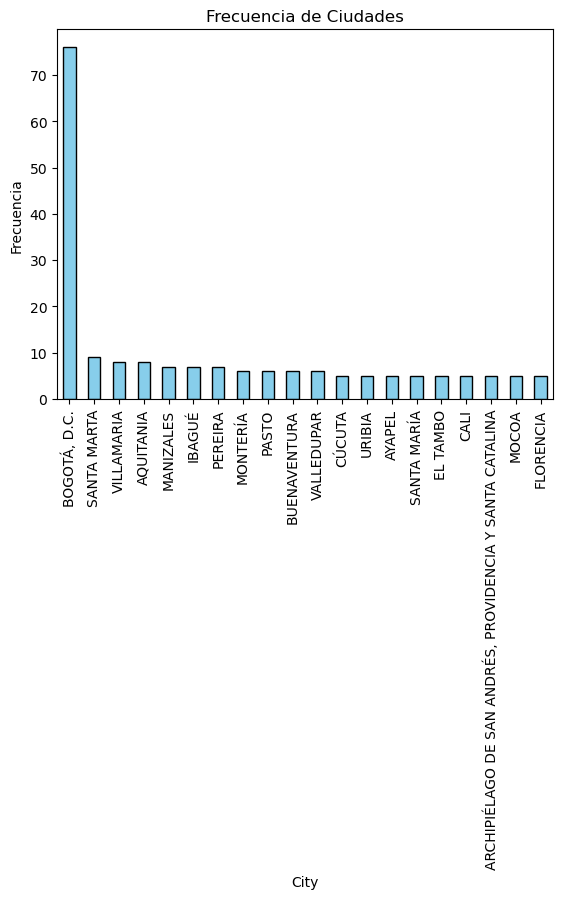

In [35]:
frecuencia_city.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("City")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de 10 primeras Ciudades")
plt.show()

In [16]:
frecuencia_dept=df_stations["Dept"].value_counts()
print(frecuencia_dept)

Dept
CUNDINAMARCA                                                84
BOGOTÁ, D.C.                                                76
BOYACÁ                                                      71
ANTIOQUIA                                                   66
TOLIMA                                                      53
HUILA                                                       49
SANTANDER                                                   48
NORTE DE SANTANDER                                          38
CALDAS                                                      37
VALLE DEL CAUCA                                             36
NARIÑO                                                      35
CHOCÓ                                                       33
CAUCA                                                       31
CÓRDOBA                                                     27
MAGDALENA                                                   23
CASANARE                                          

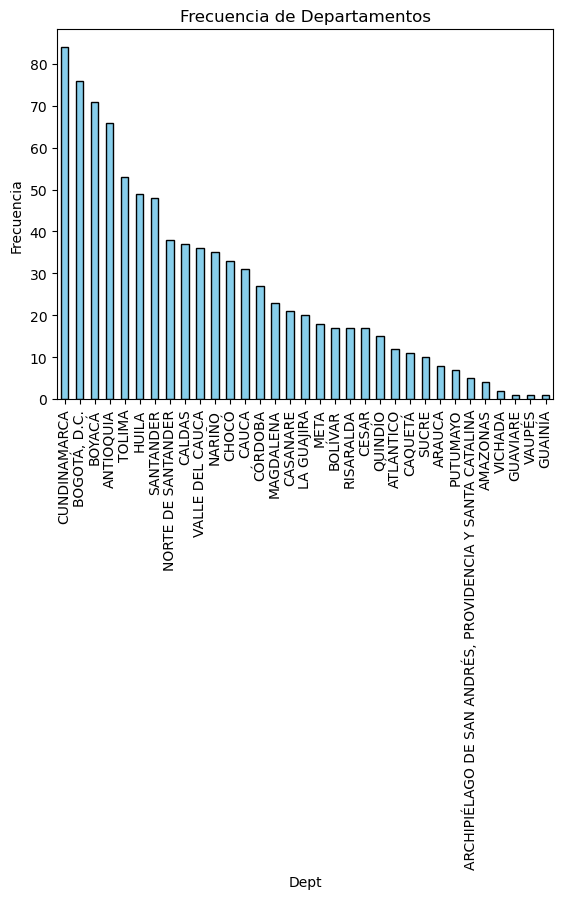

In [25]:
frecuencia_dept.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Dept")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Departamentos")
plt.show()

In [17]:
folium_map = folium.Map(location=[4.788056, -72.460000], zoom_start=6,tiles="Cartodb dark_matter")
for i in range(0,893):
    marker = folium.CircleMarker(location=[df_stations["Lat"][i],df_stations["Long"][i]],radius=3,
    color="cornflowerblue",
    stroke=False,
    fill=True,
    fill_opacity=0.6,
    opacity=1,
    popup="{}".format(df_stations["NameSta"][i]))
    marker.add_to(folium_map)
folium_map

In [18]:
path_file=r"C:\Users\Josue Florez\Documents\Maria Angelica\Proyectos\Proyecto_bootcamp\Data\CleanDatasets3 - Merged\rain0_version2.parquet"

In [19]:
df_rain=pd.read_parquet(path_file)

In [36]:
df_rain.head()

,Sta,CodSen,Date,Rain,Date_diff
0,0,0,2018-05-04 12:00:00,0,NaT
1,0,0,2018-05-04 12:10:00,0,0 days 00:10:00
2,0,0,2018-05-04 12:20:00,0,0 days 00:10:00
3,0,0,2018-05-04 12:30:00,0,0 days 00:10:00
4,0,0,2018-05-04 12:40:00,0,0 days 00:10:00


In [38]:
df_rain.describe()

,Sta,CodSen,Date,Rain,Date_diff
count,1.909770e+08,190977005.0,190977005,1.909770e+08,190976111
mean,3.835141e+02,0.0,2018-06-06 12:11:48.370322176,6.598080e+01,0 days 00:14:07.431221117
min,0.000000e+00,0.0,2003-01-20 15:20:00,0.000000e+00,0 days 00:00:01
25%,1.810000e+02,0.0,2017-02-14 13:30:00,0.000000e+00,0 days 00:05:00
50%,3.540000e+02,0.0,2019-05-28 16:30:00,0.000000e+00,0 days 00:10:00
75%,5.740000e+02,0.0,2021-02-28 14:15:00,0.000000e+00,0 days 00:10:00
max,8.930000e+02,0.0,2024-10-15 23:59:00,3.000000e+04,3550 days 12:40:00
std,2.453205e+02,0.0,NaN,9.141280e+02,1 days 10:08:05.396294843


In [54]:
df_rain['Date'] = pd.to_datetime(df_rain['Date'], errors='coerce')
    
    
df_rain['Year'] = df_rain['Date'].dt.year
df_rain['Month'] = df_rain['Date'].dt.month
    


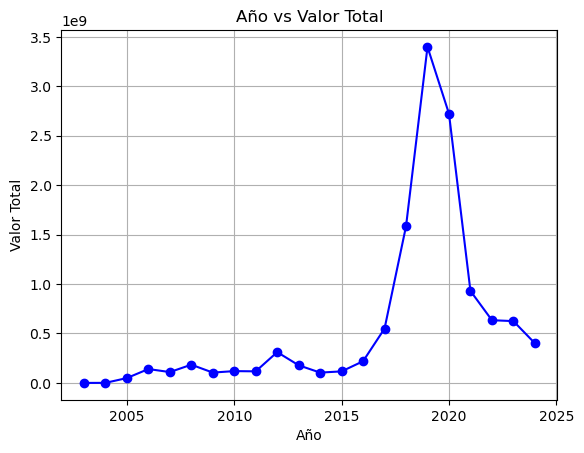

In [55]:
df_anual = df_rain.groupby('Year')['Rain'].sum()

df_anual.plot(kind='line', marker='o', color='blue')
plt.xlabel("Año")
plt.ylabel("Valor Total")
plt.title("Año vs Valor Total")
plt.grid()
plt.show()

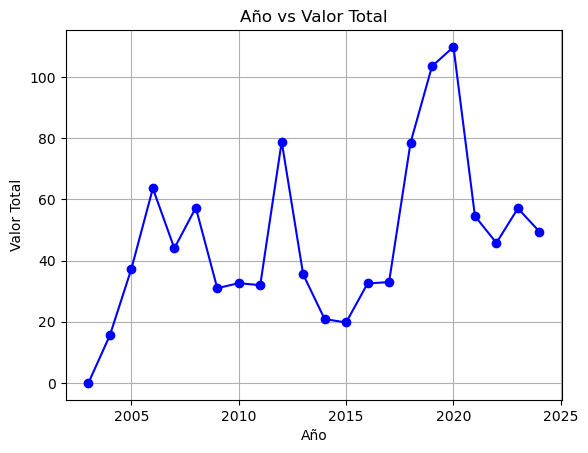

In [50]:
df_anual = df_rain.groupby('Year')['Rain'].mean()

df_anual.plot(kind='line', marker='o', color='blue')
plt.xlabel("Año")
plt.ylabel("Valor Total")
plt.title("Año vs Valor Total")
plt.grid()
plt.show()

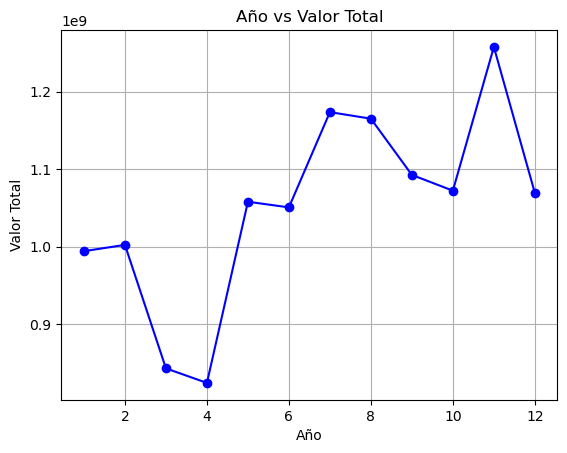

In [53]:
df_anual = df_rain.groupby('Month')['Rain'].sum()

df_anual.plot(kind='line', marker='o', color='blue')
plt.xlabel("Año")
plt.ylabel("Valor Total")
plt.title("Año vs Valor Total")
plt.grid()
plt.show()

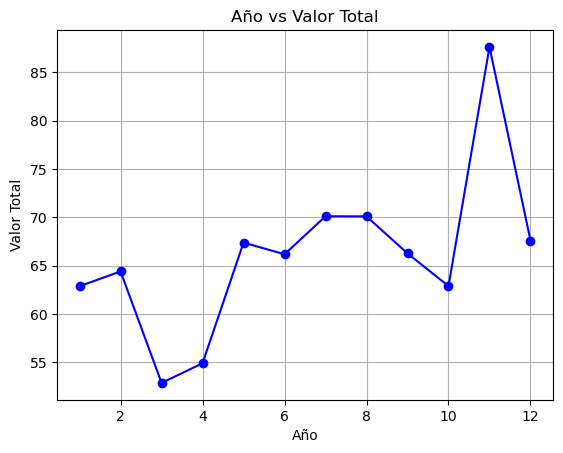

In [52]:
df_anual = df_rain.groupby('Month')['Rain'].mean()

df_anual.plot(kind='line', marker='o', color='blue')
plt.xlabel("Año")
plt.ylabel("Valor Total")
plt.title("Año vs Valor Total")
plt.grid()
plt.show()